# 2022-08-03 


In [107]:
# 의사결정나무 복습 

from sklearn.datasets import load_iris 

data = load_iris() 
y = data.target
x = data.data[:, 2:]

feature_names = data.feature_names[2:]

from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x, y)

In [108]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz


def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

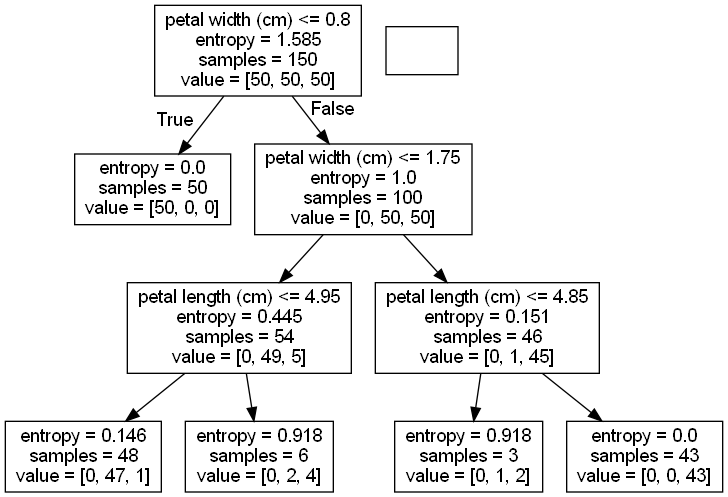

In [109]:
draw_decision_tree(tree1)

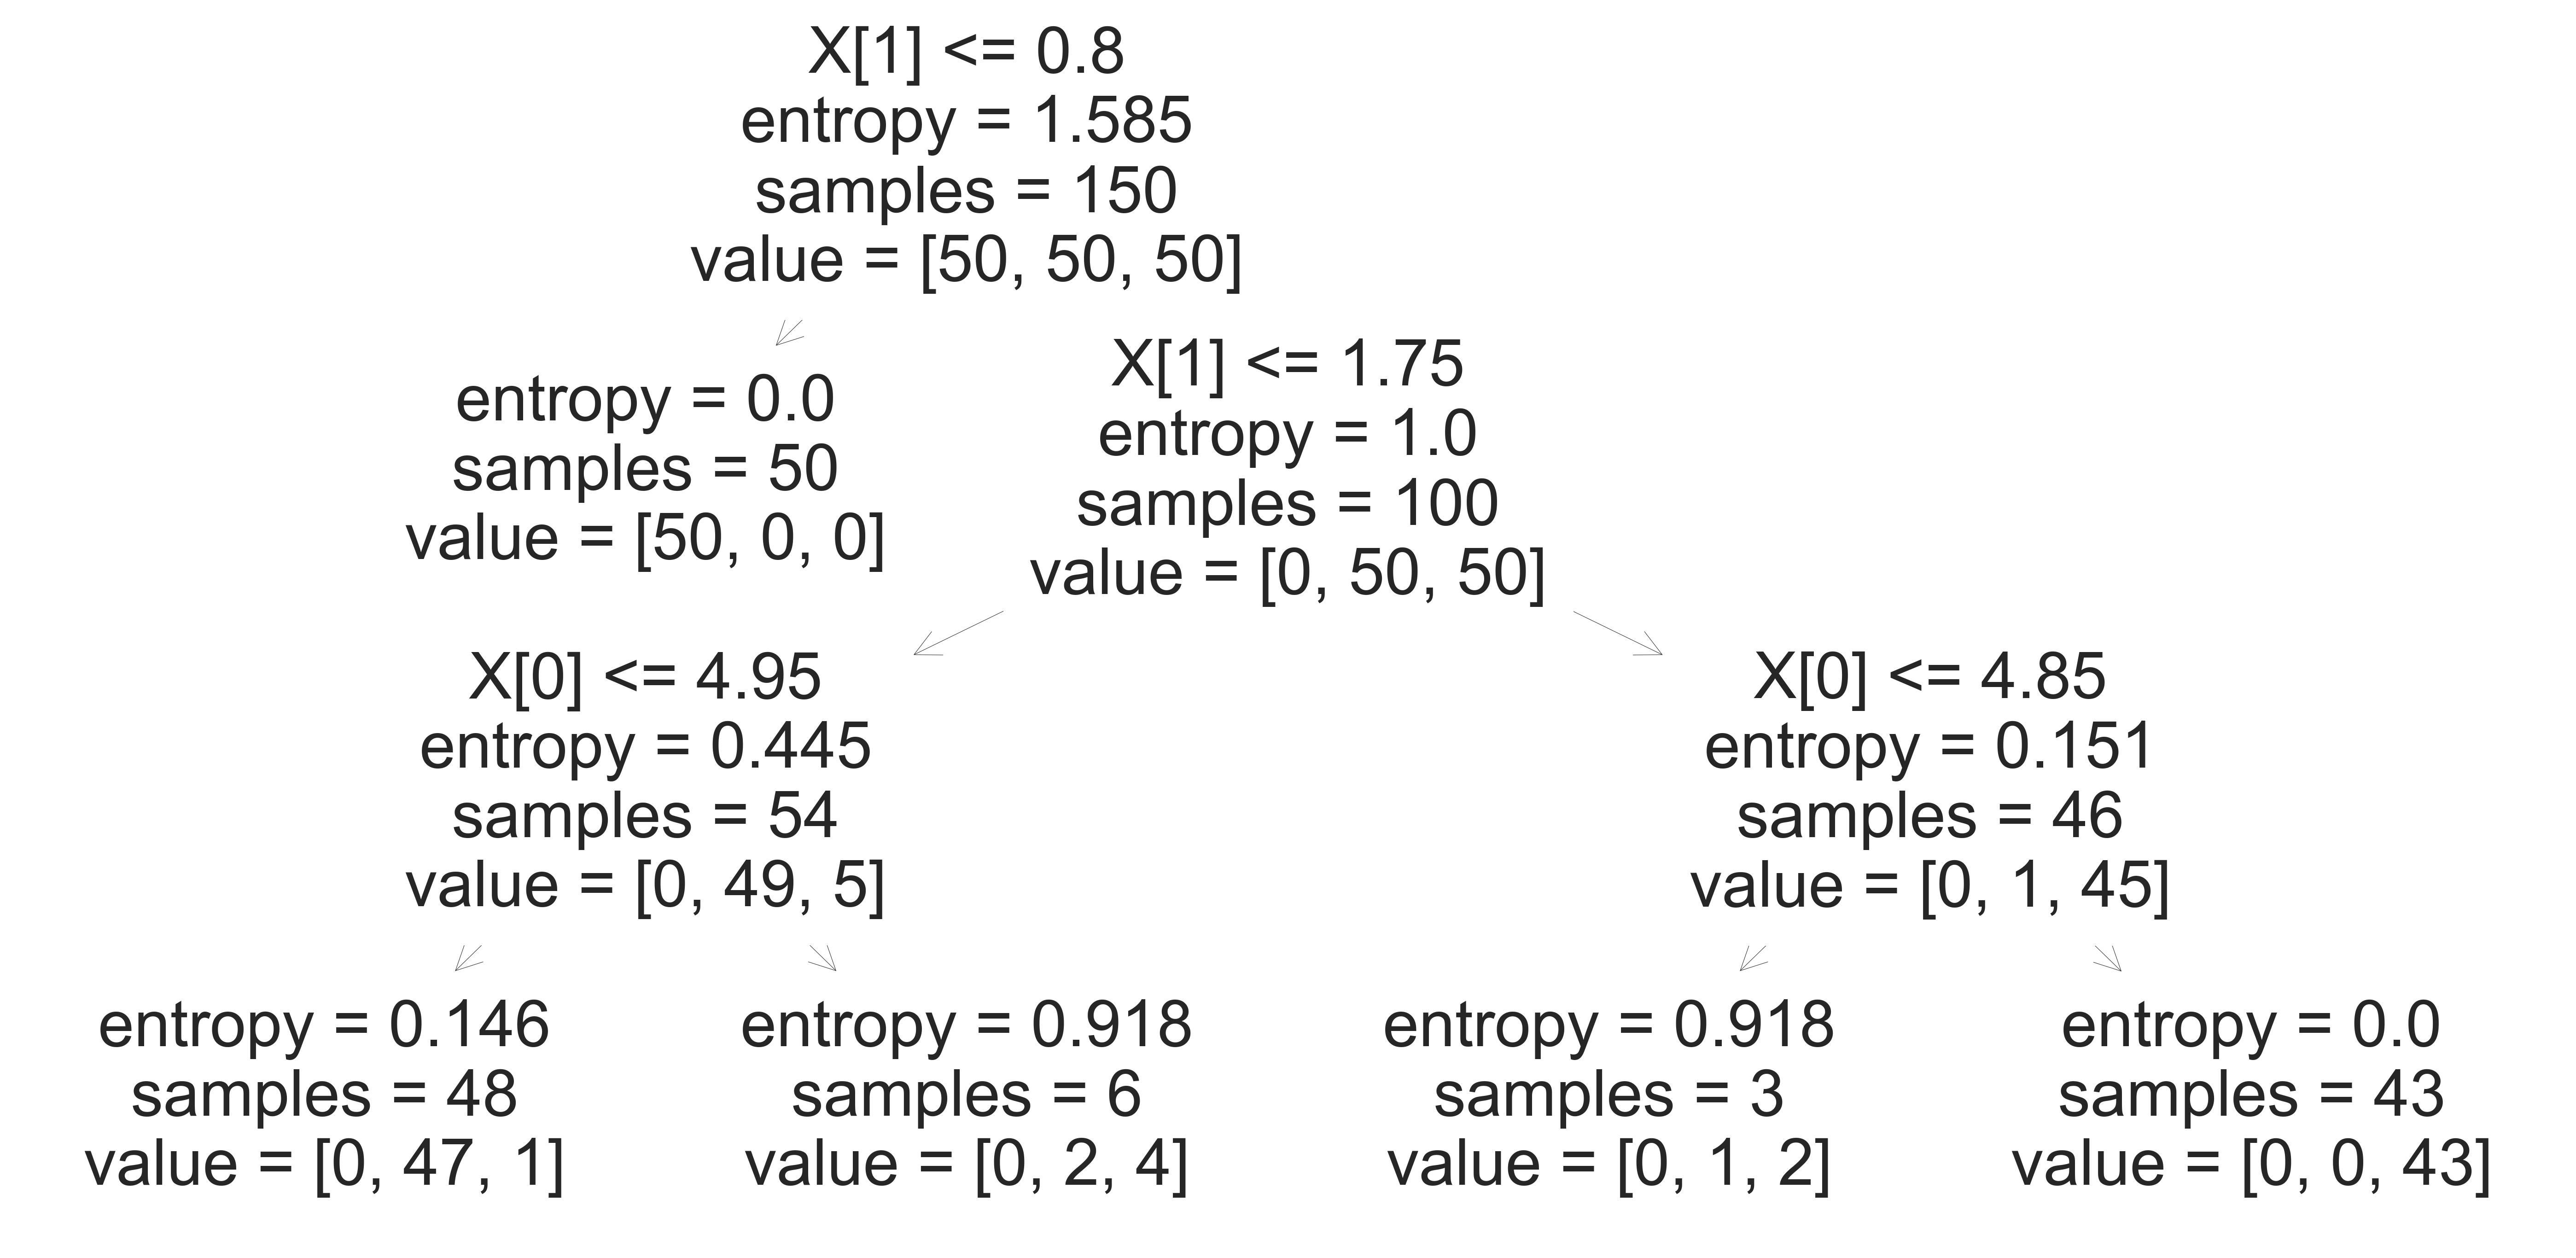

In [113]:
plt.figure(figsize=(100,50))
plot_tree(tree1)
plt.show()

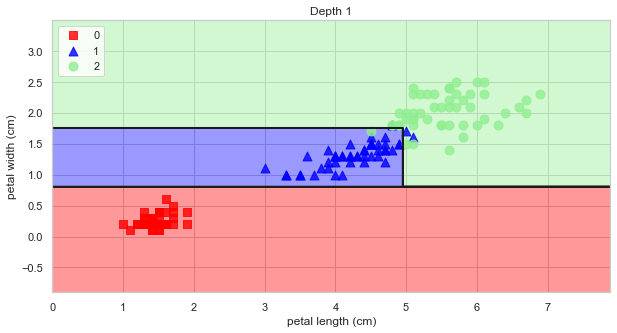

In [9]:
%matplotlib inline

plt.figure(figsize=(10,5))
plot_decision_regions(x, y, tree1, "Depth 1")
plt.show()

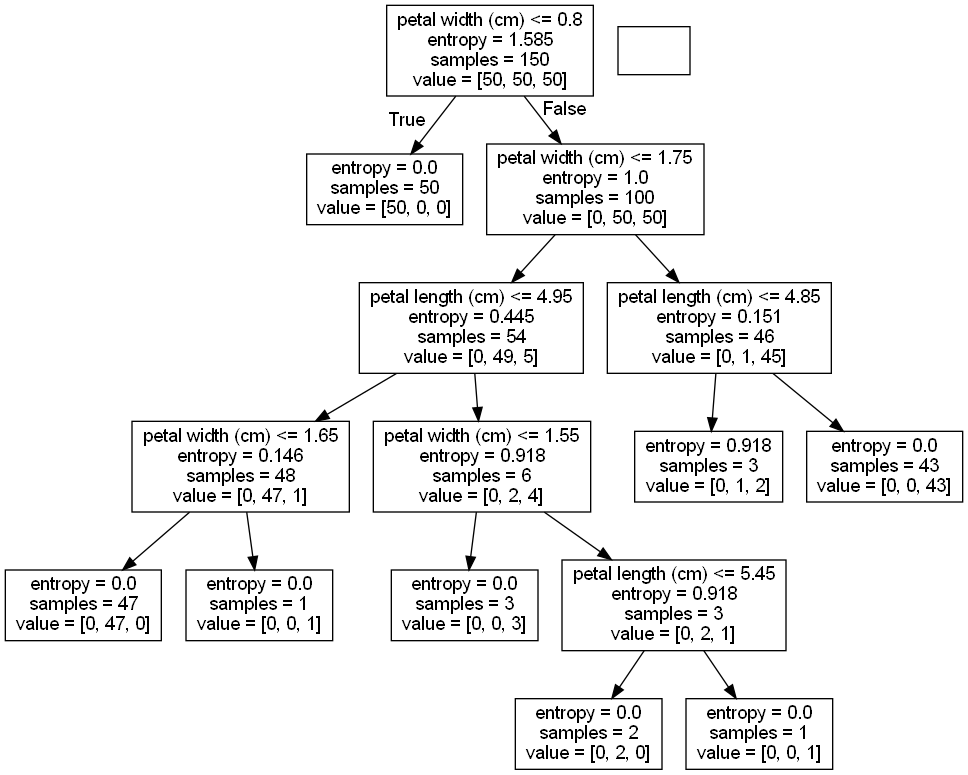

In [21]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0).fit(x, y)
draw_decision_tree(tree2)

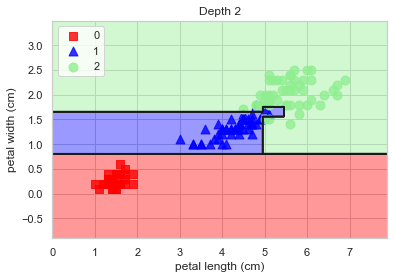

In [24]:
%matplotlib inline

plot_decision_regions(x, y, tree2, "Depth 2")
plt.show()

In [104]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(x))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

In [106]:
# 의사결정나무 모델 성능평가 
from sklearn.metrics import classification_report

print('훈련데이터에 대한 모델 성능평가')
print(classification_report(y, tree1.predict(x)))

훈련데이터에 대한 모델 성능평가
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [115]:
# 타이타닉호 생존자 예측 연습문제 

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [116]:
feature_names = ['pclass', 'age', 'sex']
dfx = df[feature_names].copy()
dfy = df['survived'].copy()
dfx.head() # 훈련용 데이터셋 

,pclass,age,sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male


In [65]:
dfy

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [117]:
from sklearn.preprocessing import LabelEncoder 

dfx['sex'] = LabelEncoder().fit_transform(dfx['sex']) # 성별 특징변수 값 --> 0과 1로 변환
dfx.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [118]:
dfx['age'].fillna(dfx['age'].mean(), inplace=True) # age 특징변수 null 값 전부 나이 평균값으로 대체해넣기 
dfx.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [68]:
dfx.isnull().sum()

pclass    0
age       0
sex       0
dtype: int64

In [69]:
dfx[['pclass']].describe()
dfx[['pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pclass  891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [119]:
from sklearn.preprocessing import LabelBinarizer 

dfx2 = pd.DataFrame(LabelBinarizer().fit_transform(dfx['pclass']), columns=['c1', 'c2', 'c3'], index=dfx.index) # pclass 특징변수 원핫인코딩 벡터 꼴로 변환
dfx = pd.concat([dfx, dfx2], axis=1);dfx
del(dfx['pclass'])
dfx.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


In [120]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.25, random_state=0) # 훈련용데이터 75, 테스트데이터 25

model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,  max_depth=100).fit(x_train, y_train)

confusion_matrix(y_train, model.predict(x_train))

array([[375,  35],
       [ 67, 191]], dtype=int64)

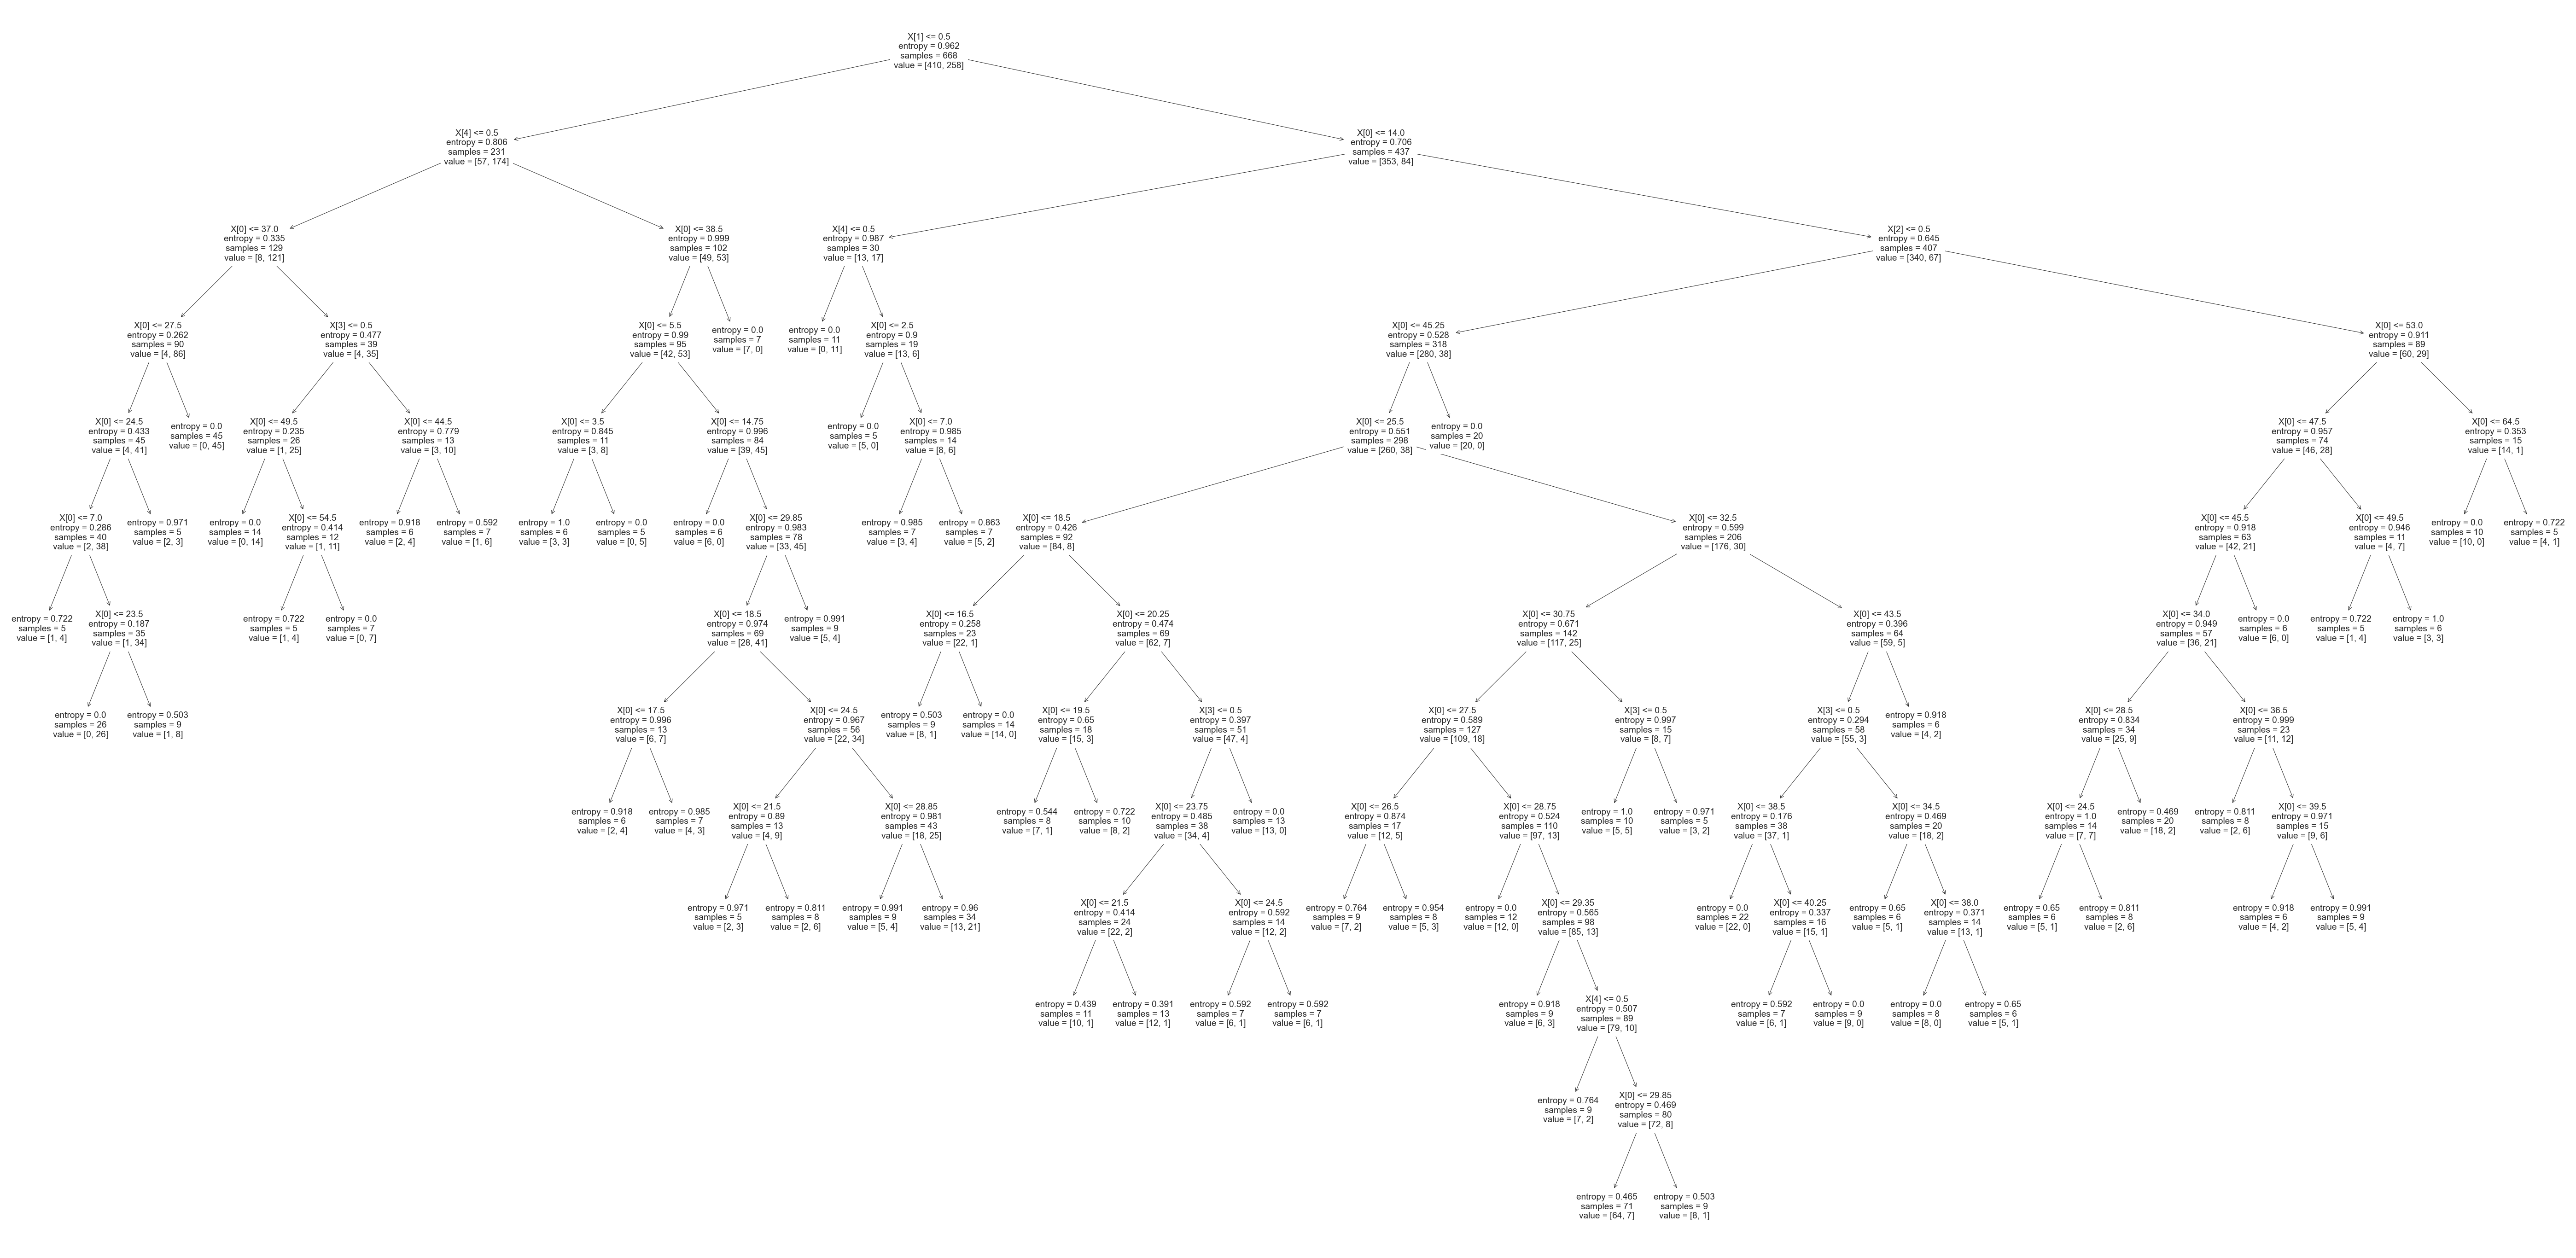

In [123]:
plt.figure(figsize=(100,50))
plot_tree(model)
plt.show()

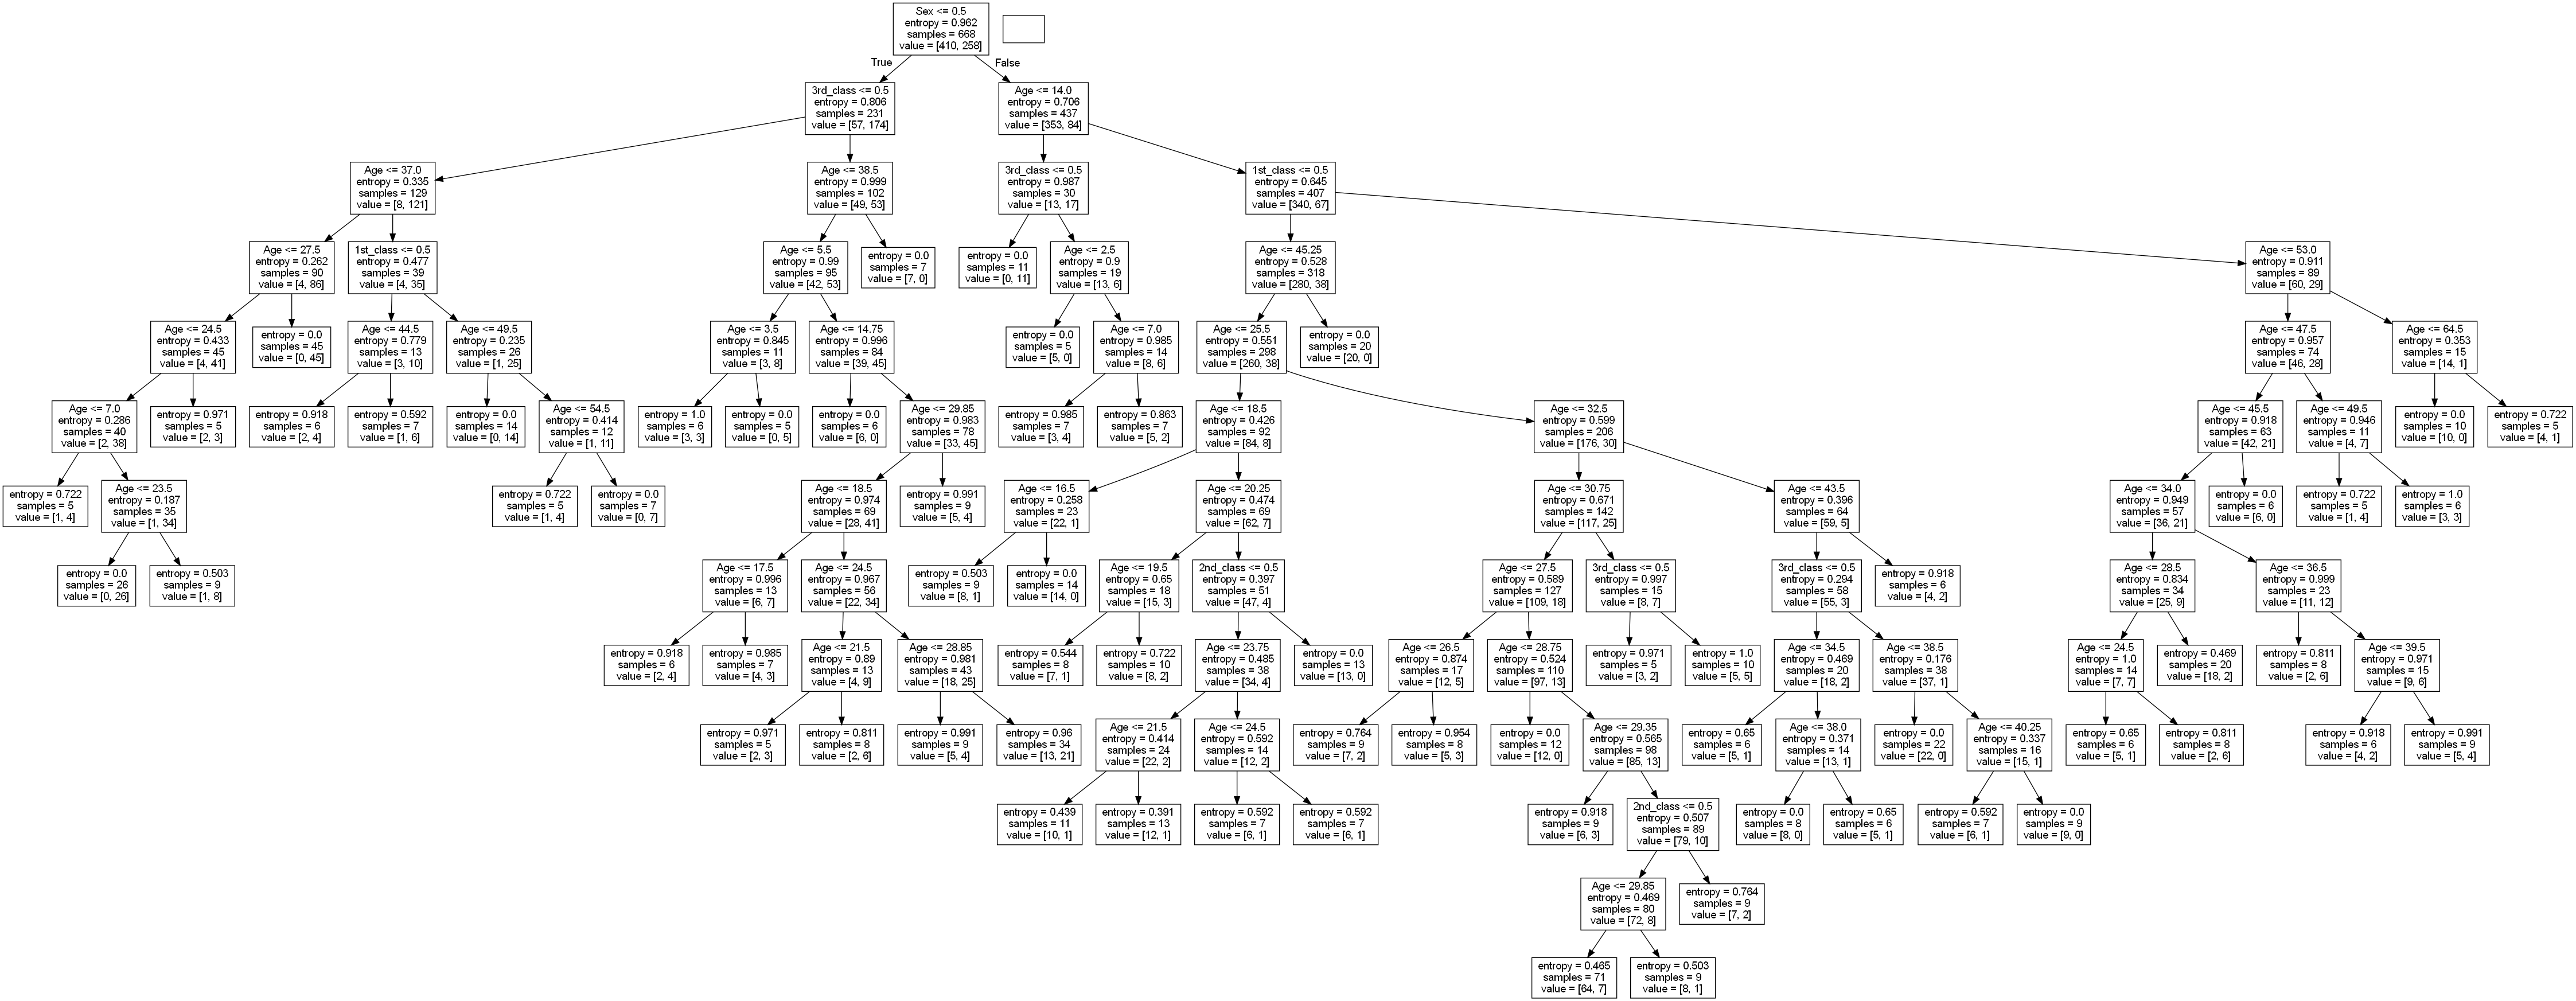

In [96]:
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                'Age', 'Sex', '1st_class', '2nd_class', '3rd_class'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

In [97]:
confusion_matrix(y_train, model.predict(x_train))

array([[375,  35],
       [ 67, 191]], dtype=int64)

In [100]:
confusion_matrix(y_test, model.predict(x_test))

array([[124,  15],
       [ 29,  55]], dtype=int64)

In [102]:
# 의사결정나무 모델 성능평가 
from sklearn.metrics import classification_report

print('훈련데이터에 대한 모델 성능평가')
print(classification_report(y_train, model.predict(x_train)))

훈련데이터에 대한 모델 성능평가
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       410
           1       0.85      0.74      0.79       258

    accuracy                           0.85       668
   macro avg       0.85      0.83      0.83       668
weighted avg       0.85      0.85      0.85       668



In [106]:
print('테스트데이터에 대한 성능평가')
print(classification_report(y_test, model.predict(x_test)))

테스트데이터에 대한 성능평가
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       139
           1       0.79      0.65      0.71        84

    accuracy                           0.80       223
   macro avg       0.80      0.77      0.78       223
weighted avg       0.80      0.80      0.80       223



In [114]:
# 연습문제 2

from sklearn.datasets import load_breast_cancer

bcancer = load_breast_cancer()
x2 = bcancer.data ; y2 = bcancer.target 

from sklearn.tree import DecisionTreeClassifier 

tree3 = DecisionTreeClassifier()
tree3.fit(x2, y2)

from sklearn.model_selection import cross_val_score 

cross_val_score(tree3, x2, y2, scoring='accuracy', cv=5).mean() # 5-fold 교차검증 해서 평균성능

0.9208818506443098

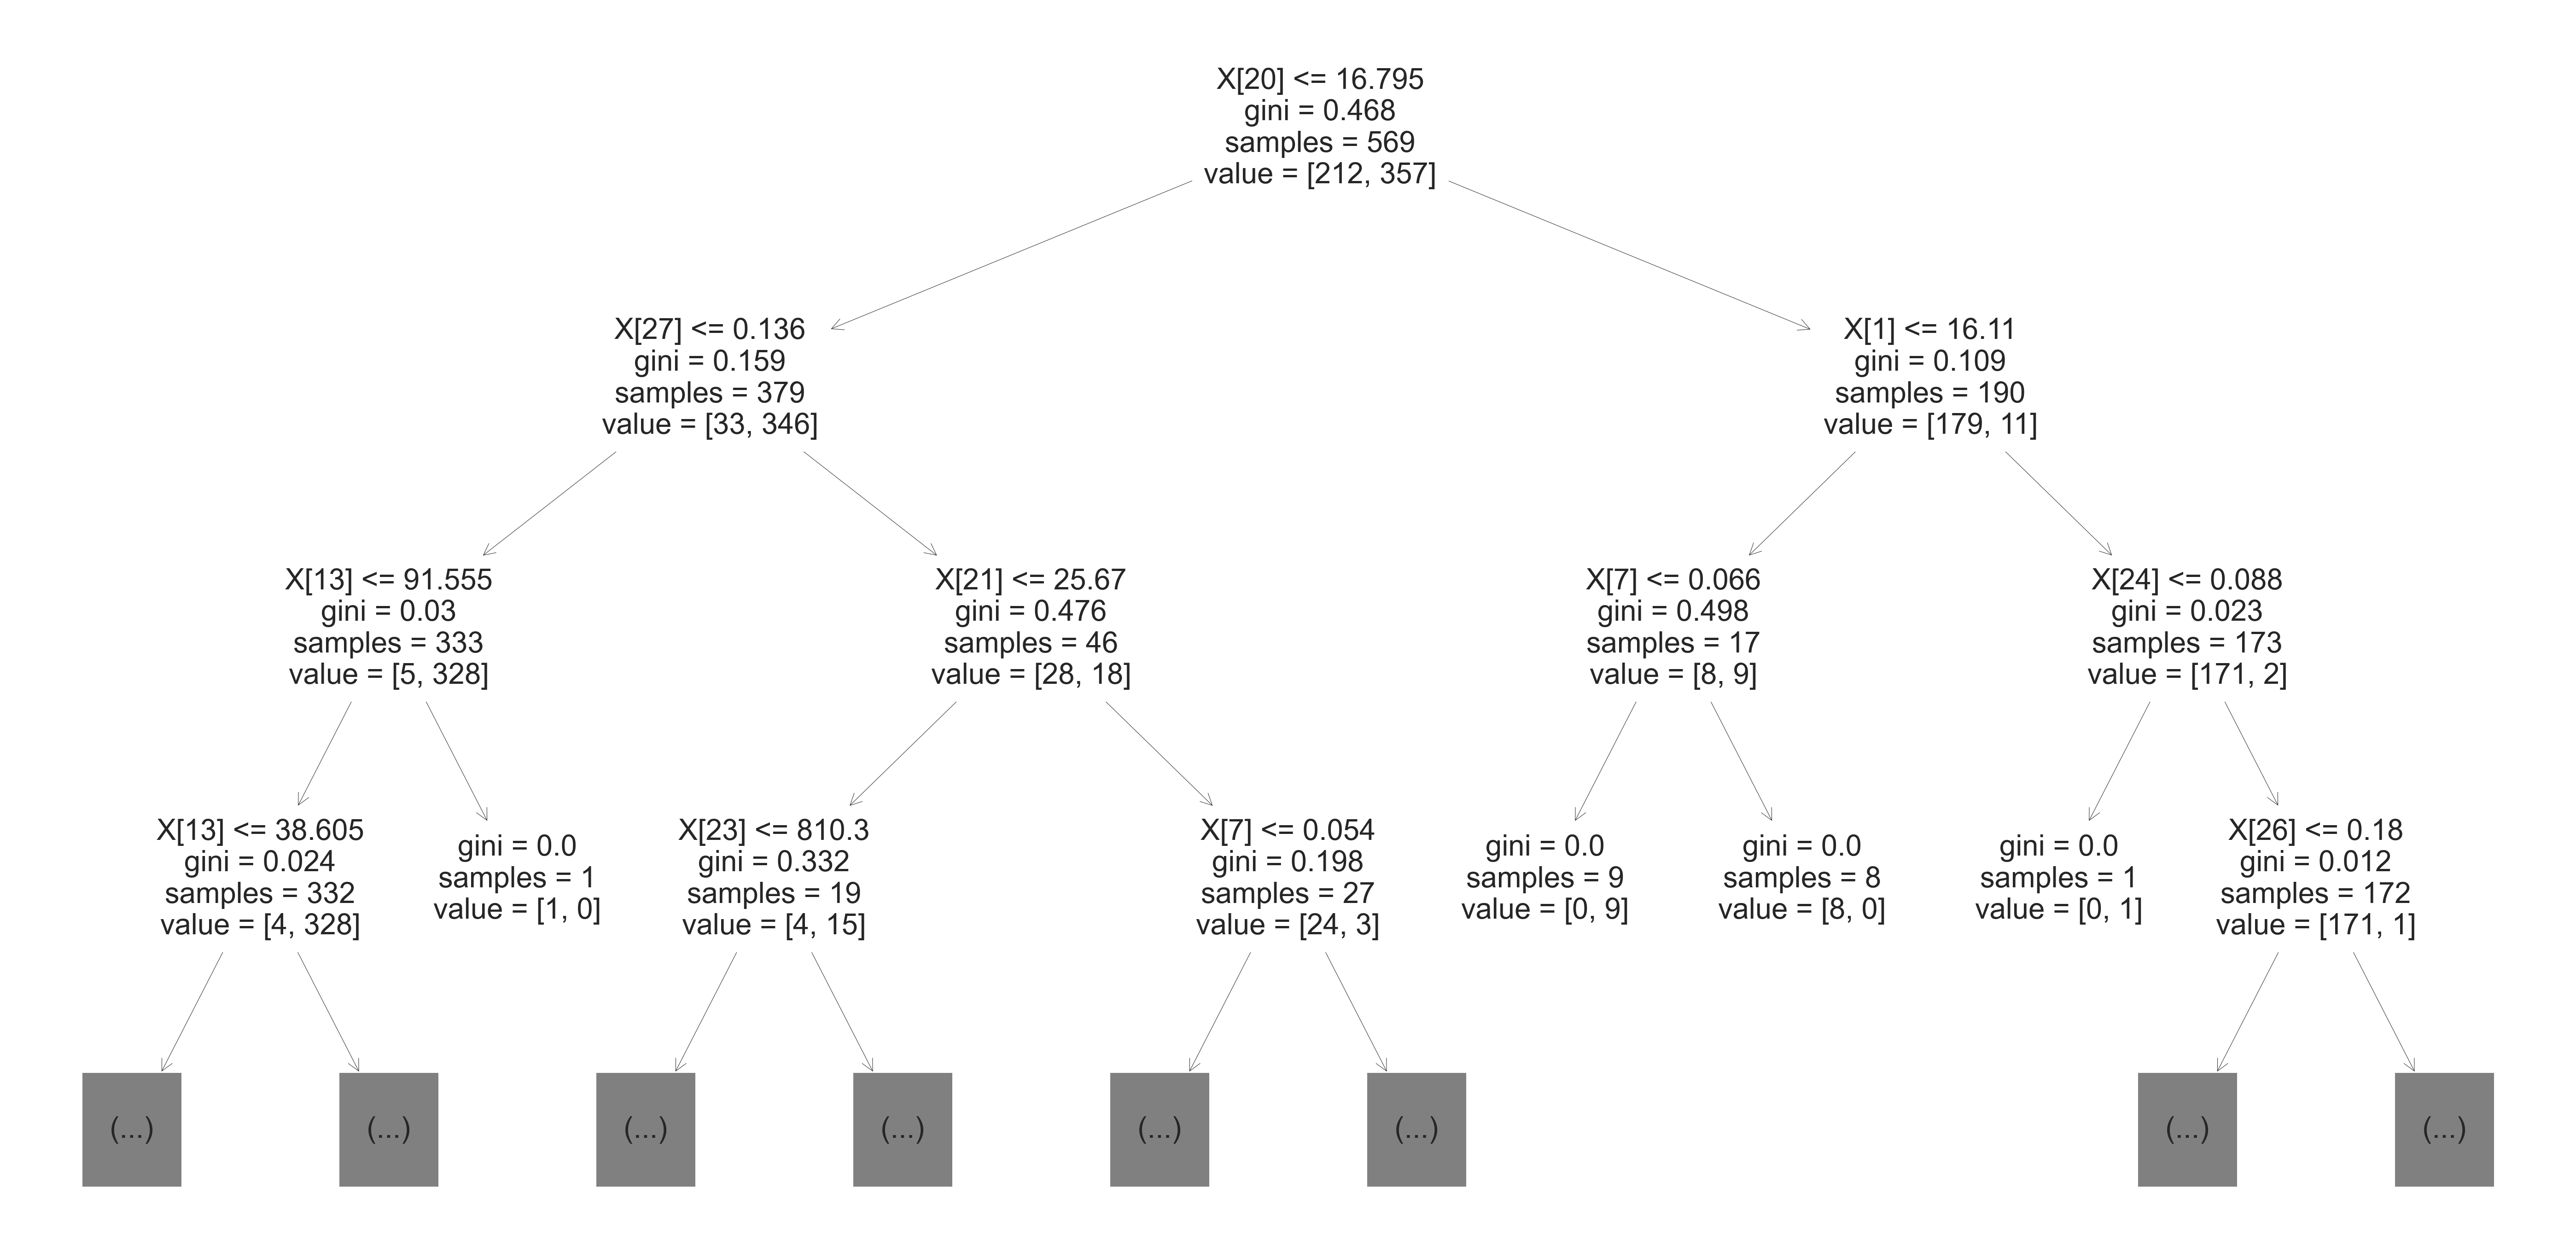

In [118]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100,50))
plot_tree(tree3, max_depth=3)
plt.show()

In [127]:
print(bcancer.feature_names[20])

worst radius


In [145]:
# 연습문제 3
from sklearn.datasets import load_digits

digits = load_digits() 
x3 = digits.data ; y3 = digits.target 

from sklearn.tree import DecisionTreeClassifier

tree4 = DecisionTreeClassifier().fit(x3, y3)

pd.concat([pd.DataFrame(x3, columns = list(range(len(x3[0])))), pd.DataFrame(y3, columns=['target'])], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [150]:
confusion_matrix(y3, tree4.predict(x3))

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 182,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]], dtype=int64)

In [151]:
print(classification_report(y3, tree4.predict(x3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797



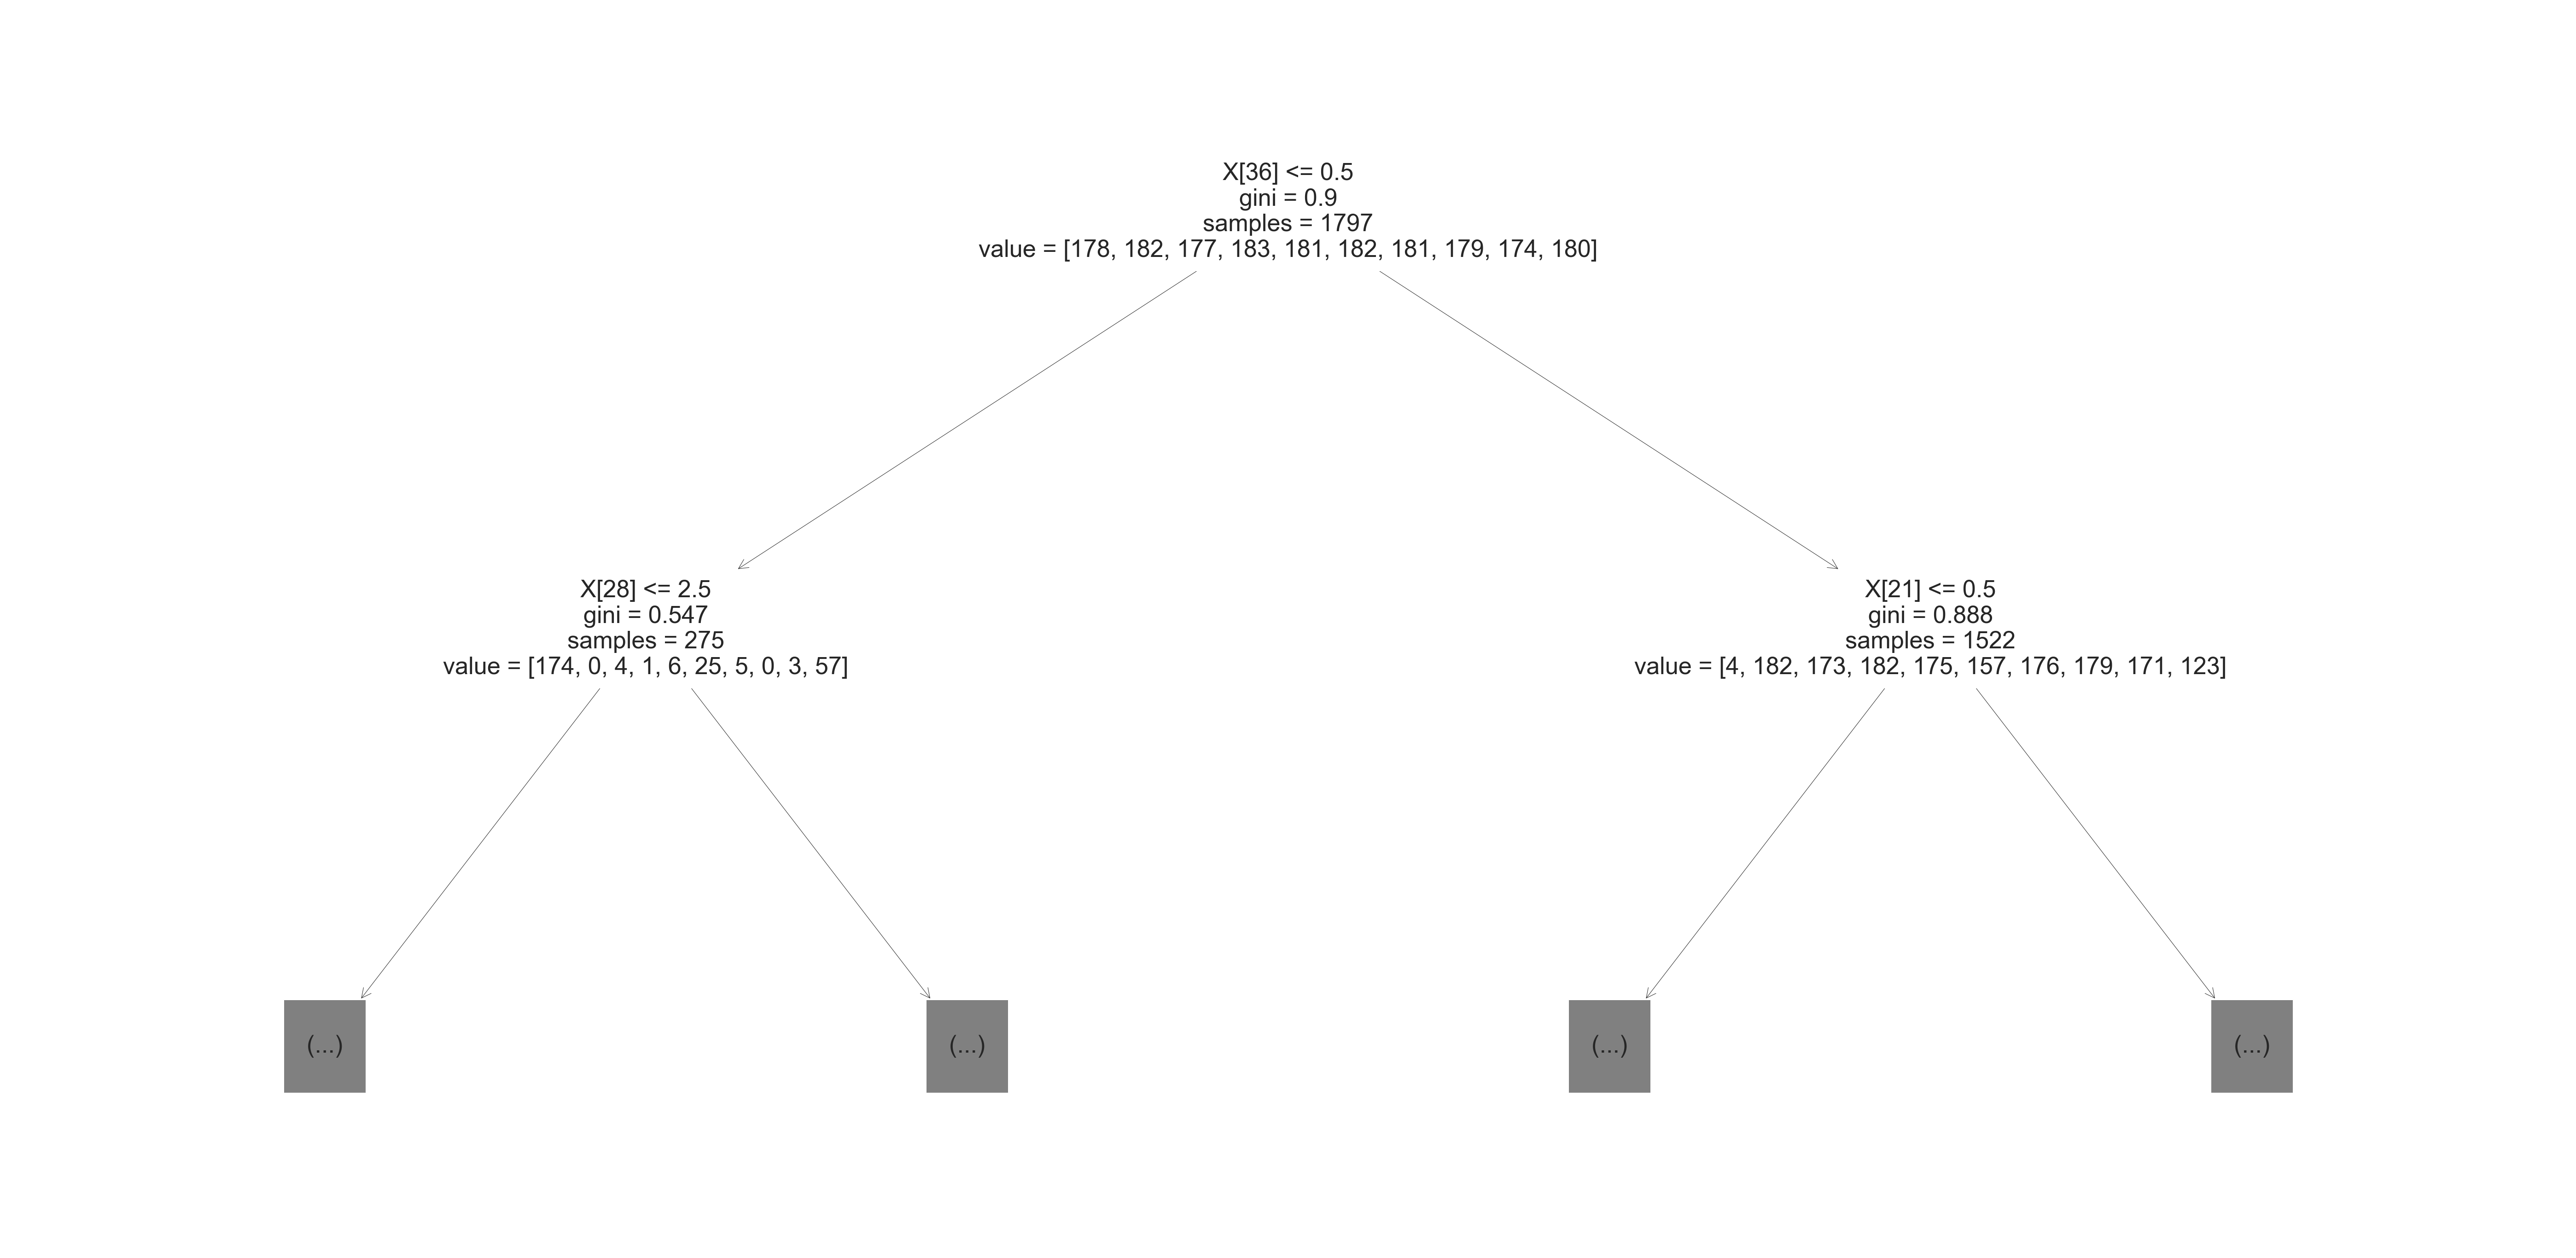

In [156]:
plt.figure(figsize=(100,50))
plot_tree(tree4, max_depth=1)
plt.show()

In [13]:
# 연습문제 4 

import sys 
sys.path.append('C:/Users/user/Desktop/kibeomkim/080260-main/Chapter07/Social_Network_Ads.csv')

In [62]:
df = pd.read_csv('C:/Users/user/Desktop/kibeomkim/080260-main/Chapter07/Social_Network_Ads.csv');df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
df.drop('User ID', inplace=True, axis=1)

In [64]:
from sklearn.preprocessing import LabelBinarizer 

df = pd.concat([pd.DataFrame(LabelBinarizer().fit_transform(df['Gender']), columns=['Gender2']), df], axis=1)

In [65]:
df.drop('Gender', axis=1, inplace=True)

In [66]:
df

,Gender2,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [68]:
y4 = df['Purchased']
x4 = df.iloc[:, :3]

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

x_train, x_test, y_train, y_test = train_test_split(x4, y4, test_size=0.25, random_state=0)

[[169  20]
 [  7 104]]


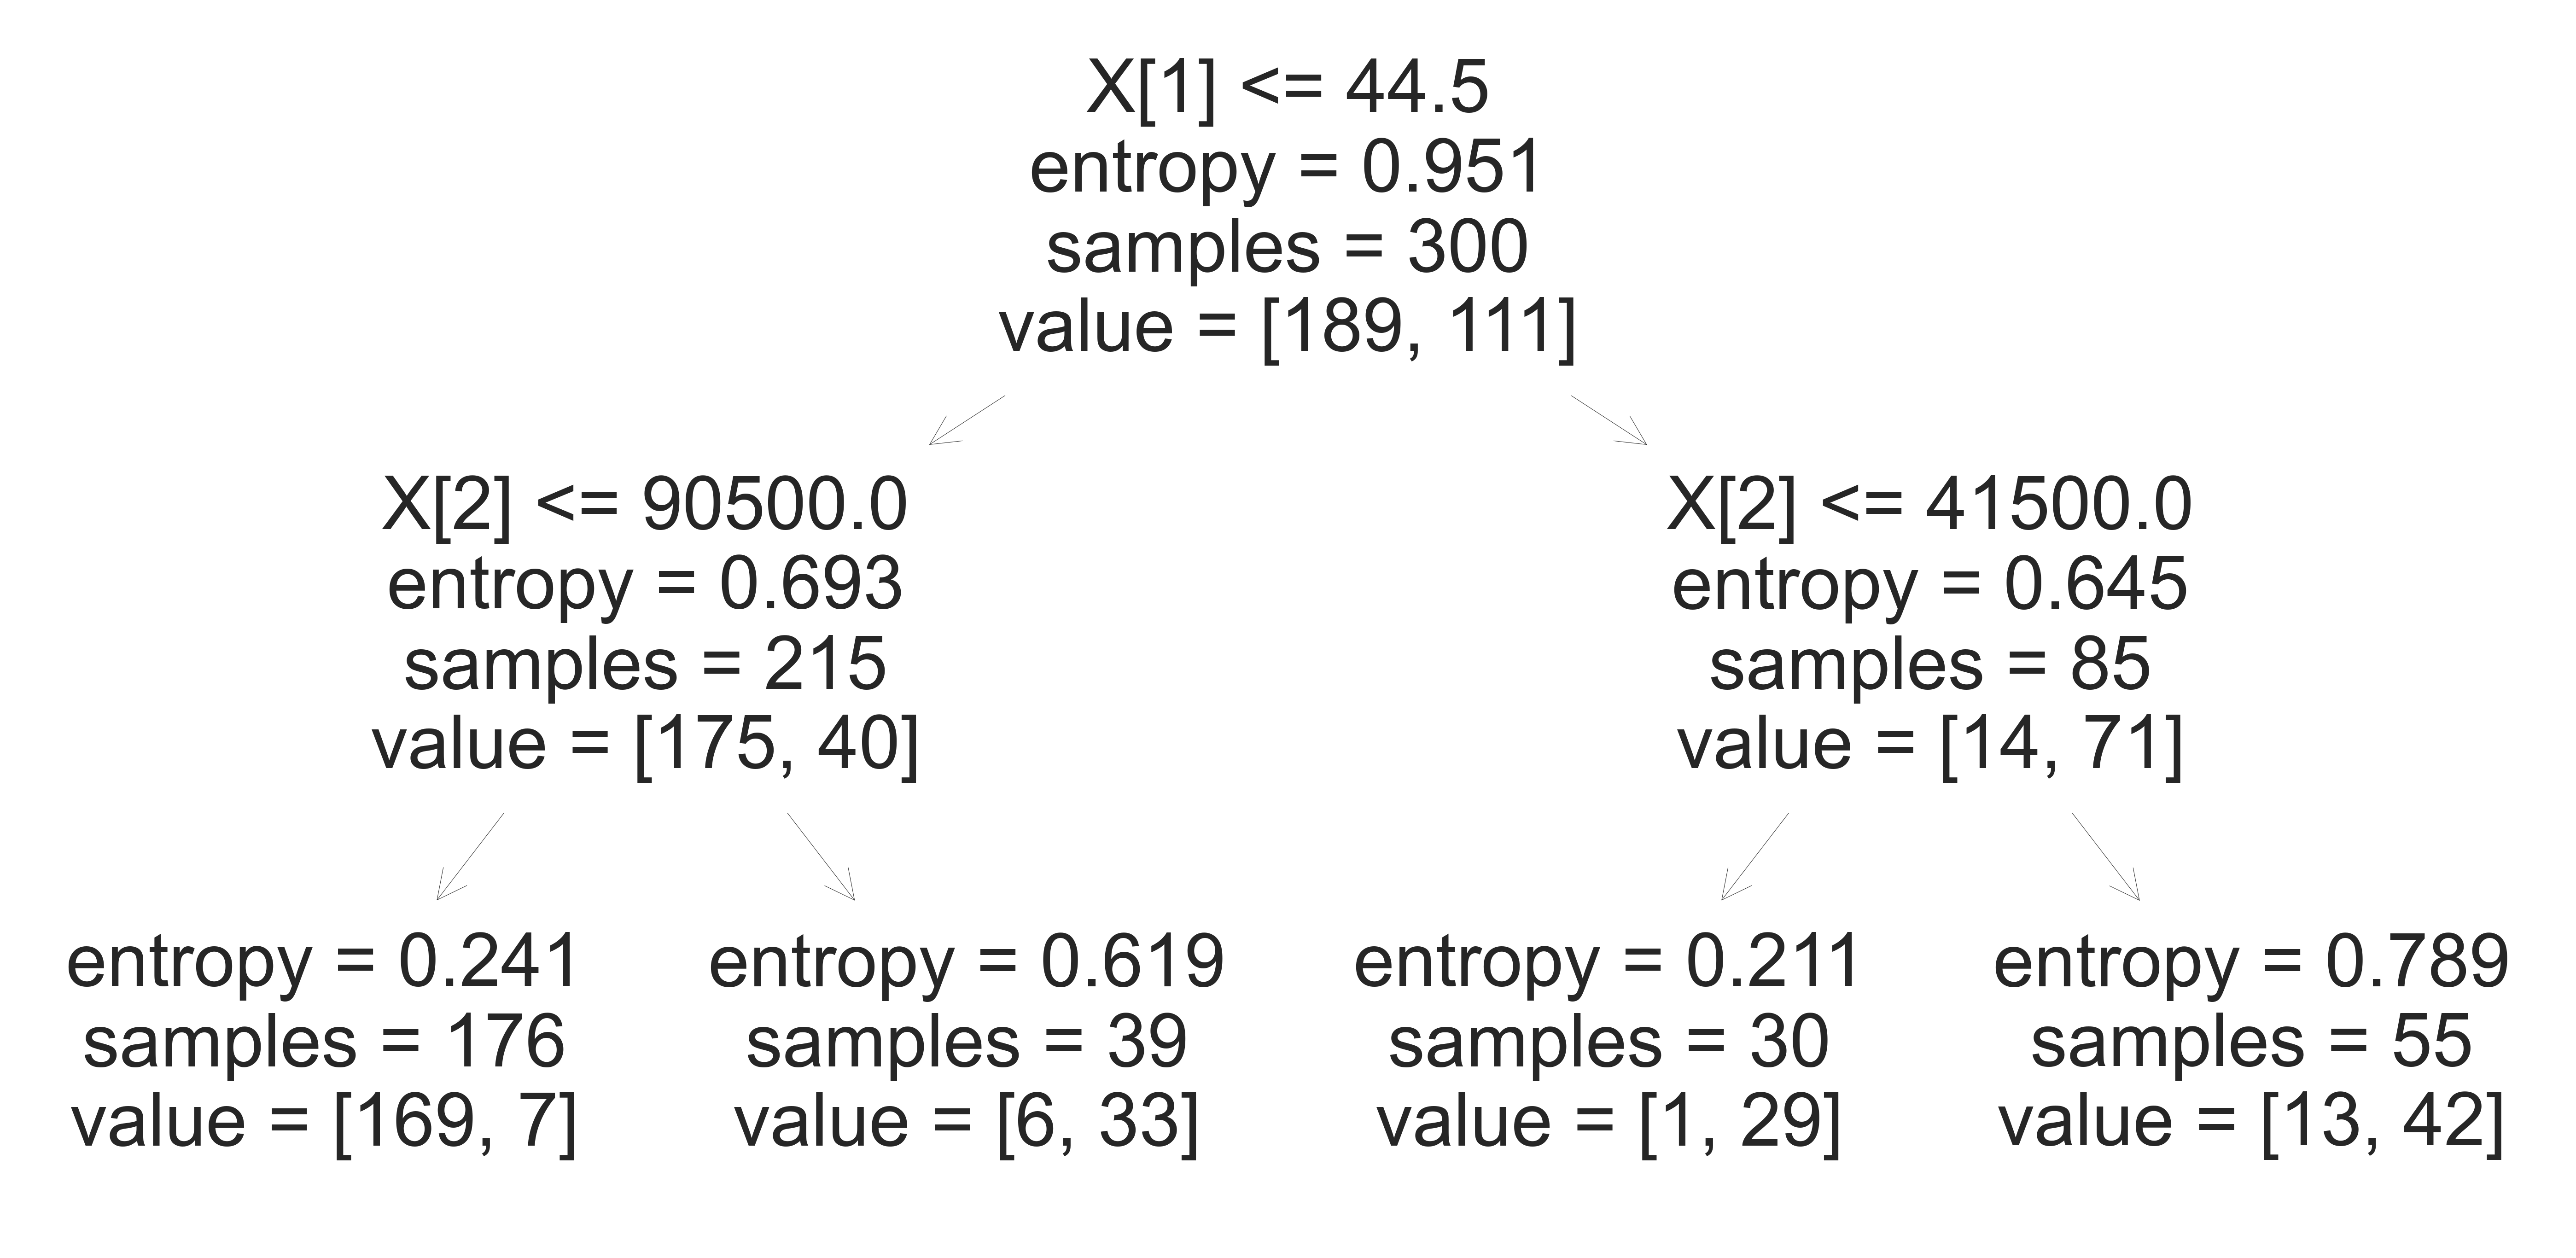

In [90]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(x_train, y_train)
print(confusion_matrix(y_train, tree_model.predict(x_train)))
from sklearn.tree import plot_tree
%matplotlib inline
plt.figure(figsize=(100,50))
plot_tree(tree_model)
plt.show()

In [99]:
print(confusion_matrix(y_test, tree_model.predict(x_test))) 

from sklearn.metrics import classification_report

print('훈련데이터에 대한 모델 성능평가')
print(classification_report(y_test, tree_model.predict(x_test)))

[[64  4]
 [ 2 30]]
훈련데이터에 대한 모델 성능평가
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100

